In [4]:
# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime

# Read the dataset
df = pd.read_csv('C:\\Users\\keert\\Downloads\\amazon_sales_data 2025.csv')
print("Dataset columns:")
print(df.columns.tolist())
print("\
First few rows:")
print(df.head())

Dataset columns:
['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity', 'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method', 'Status']
First few rows:
  Order ID      Date        Product     Category  Price  Quantity  \
0  ORD0001  14-03-25  Running Shoes     Footwear     60         3   
1  ORD0002  20-03-25     Headphones  Electronics    100         4   
2  ORD0003  15-02-25  Running Shoes     Footwear     60         2   
3  ORD0004  19-02-25  Running Shoes     Footwear     60         3   
4  ORD0005  10-03-25     Smartwatch  Electronics    150         3   

   Total Sales  Customer Name Customer Location Payment Method     Status  
0          180     Emma Clark          New York     Debit Card  Cancelled  
1          400  Emily Johnson     San Francisco     Debit Card    Pending  
2          120       John Doe            Denver     Amazon Pay  Cancelled  
3          180  Olivia Wilson            Dallas    Credit Card    Pending  
4          450     Emma Cl

C:\Users\keert\AppData\Local\Temp\ipykernel_28224\1130902114.py:24: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



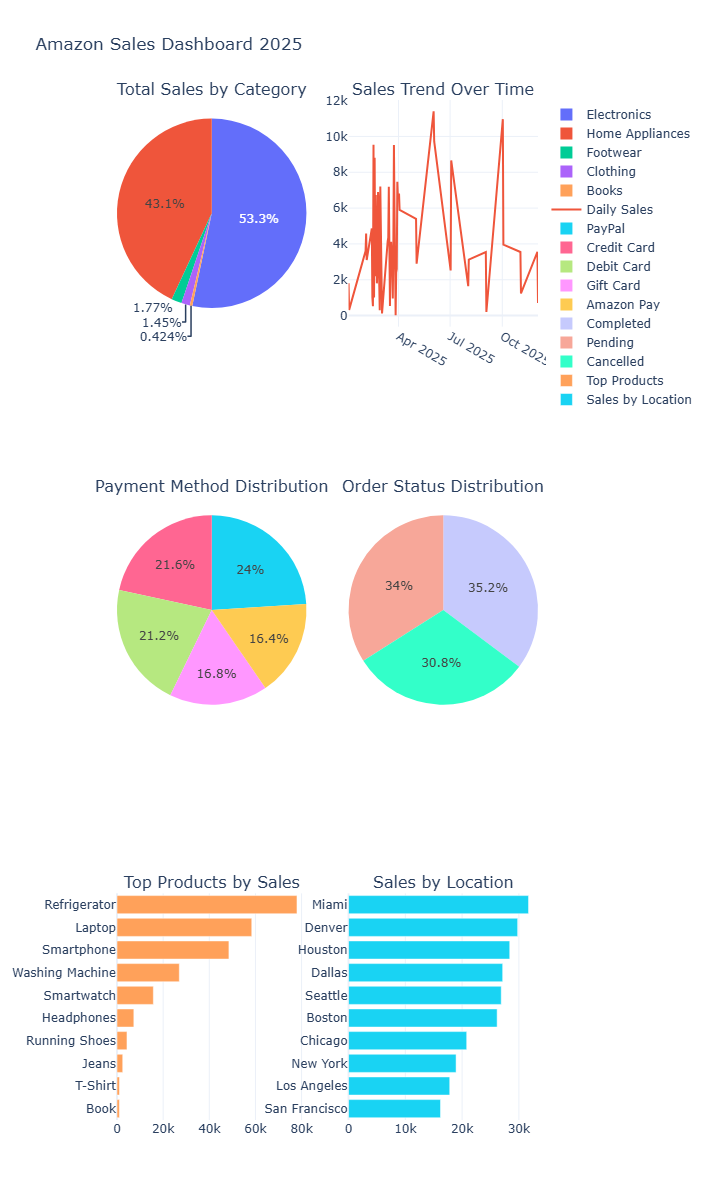

Key Metrics:
Total Sales: $ 243845
Average Order Value: $ 975.38
Total Orders: 250
Total Unique Customers: 10


In [26]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Create the dashboard layout
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Total Sales by Category', 'Sales Trend Over Time', 
                   'Payment Method Distribution', 'Order Status Distribution',
                   'Top Products by Sales', 'Sales by Location'),
    specs=[[{"type": "pie"}, {"type": "scatter"}],
           [{"type": "pie"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# 1. Total Sales by Category
category_sales = df.groupby('Category')['Total Sales'].sum()
fig.add_trace(
    go.Pie(labels=category_sales.index, values=category_sales.values, name="Sales by Category"),
    row=1, col=1
)

# 2. Sales Trend Over Time - Using np.array for datetime conversion
daily_sales = df.groupby('Date')['Total Sales'].sum().reset_index()
x_dates = np.array(daily_sales['Date'].dt.to_pydatetime())
fig.add_trace(
    go.Scatter(x=x_dates, y=daily_sales['Total Sales'], mode='lines', name="Daily Sales"),
    row=1, col=2
)

# 3. Payment Method Distribution
payment_dist = df['Payment Method'].value_counts()
fig.add_trace(
    go.Pie(labels=payment_dist.index, values=payment_dist.values, name="Payment Methods"),
    row=2, col=1
)

# 4. Order Status Distribution
status_dist = df['Status'].value_counts()
fig.add_trace(
    go.Pie(labels=status_dist.index, values=status_dist.values, name="Order Status"),
    row=2, col=2
)

# 5. Top Products by Sales
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=True).tail(10)
fig.add_trace(
    go.Bar(x=product_sales.values, y=product_sales.index, orientation='h', name="Top Products"),
    row=3, col=1
)

# 6. Sales by Location
location_sales = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=True).tail(10)
fig.add_trace(
    go.Bar(x=location_sales.values, y=location_sales.index, orientation='h', name="Sales by Location"),
    row=3, col=2
)

# Update layout
fig.update_layout(
    height=1200, 
    width=1200, 
    showlegend=True, 
    title_text="Amazon Sales Dashboard 2025",
    template="plotly_white"
)

fig.show()

# Calculate key metrics
total_sales = df['Total Sales'].sum()
avg_order_value = df['Total Sales'].mean()
total_orders = len(df)
total_customers = df['Customer Name'].nunique()

print("\
Key Metrics:")
print("Total Sales: $", round(total_sales, 2))
print("Average Order Value: $", round(avg_order_value, 2))
print("Total Orders:", total_orders)
print("Total Unique Customers:", total_customers)